# Statistical Test on the dataset

In [55]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings

plt.style.use('ggplot')
warnings.filterwarnings("ignore")

In [56]:
# importing data
data = pd.read_excel("../data/us_macro_data.xlsx")
data.set_index("date", inplace=True)
# converting date to datetime
data.index = pd.to_datetime(data.index)
data.head()

,gdp_gap,interest,inflation
date,,,
1990-04-01,2.222960,8.243333,0.908179
1990-07-01,1.669204,8.160000,1.270794
1990-10-01,0.130471,7.743333,1.323082
1991-01-01,-0.949175,6.426667,0.525607
1991-04-01,-0.797348,5.863333,0.545734


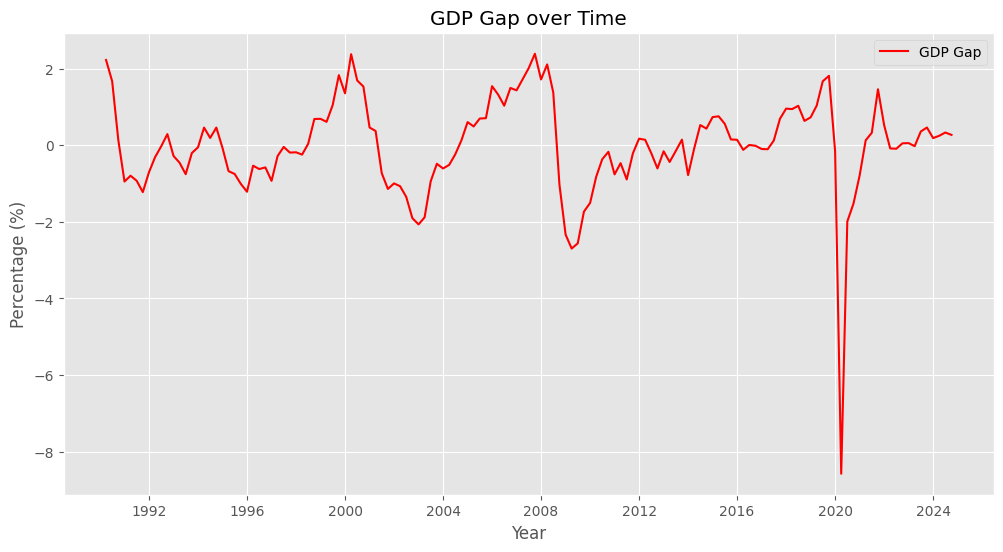

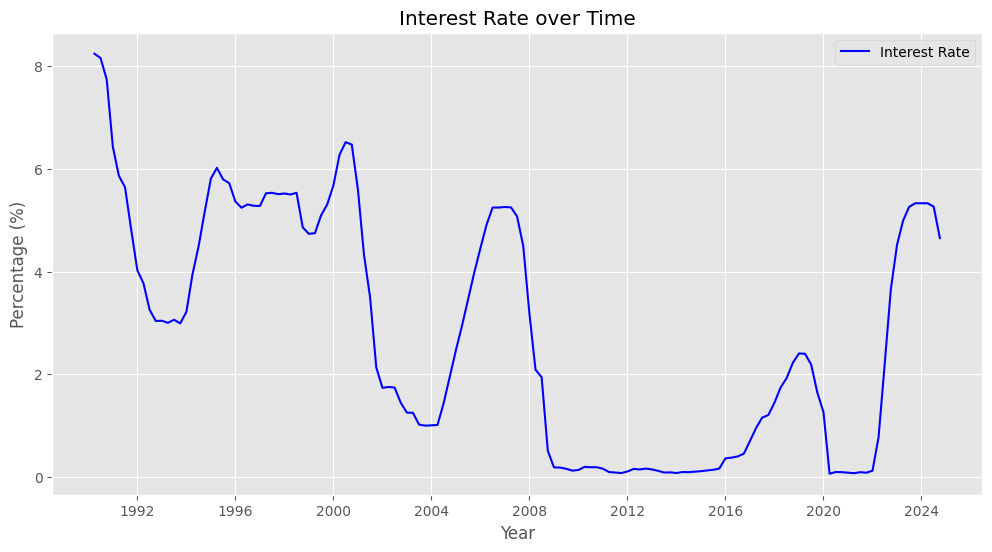

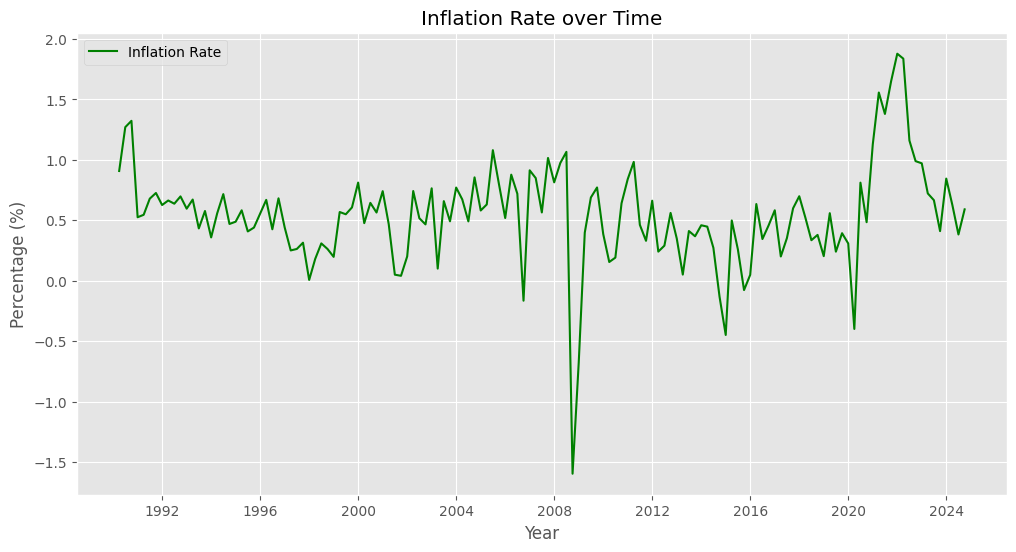

In [57]:
# plotting the data

labels = {
    "gdp_gap": ("GDP Gap", "red"),
    "interest": ("Interest Rate", "blue"), 
    "inflation": ("Inflation Rate", "green"),
}

for col in data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[col], label=labels[col][0], color=labels[col][1])
    plt.title(f"{labels[col][0]} over Time")
    plt.xlabel("Year")
    plt.ylabel("Percentage (%)")
    plt.legend()
    plt.savefig(f"../figures/{col}_series.png")
    plt.show()

## Checking for stationarity

In [58]:
# ADF test
def adf_test(series, max_lag=None, regression='c'):
    """Run ADF test with automatic lag selection (BIC)."""
    result = sm.tsa.stattools.adfuller(series, maxlag=max_lag, autolag='BIC', regression=regression)
    print(f'Variable: {series.name}')
    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}')
    print(f'Lags used: {result[2]}')
    print(f'Critical Values: {result[4]}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis (series is stationary)")
    else:
        print("Fail to reject the null hypothesis (series is non-stationary)")
    print('---')

# Apply to each variable
for col in data.columns:
    adf_test(data[col], max_lag=8, regression='c')


Variable: gdp_gap
ADF Statistic: -5.653
p-value: 0.000
Lags used: 0
Critical Values: {'1%': np.float64(-3.47864788917503), '5%': np.float64(-2.882721765644168), '10%': np.float64(-2.578065326612056)}
Reject the null hypothesis (series is stationary)
---
Variable: interest
ADF Statistic: -3.379
p-value: 0.012
Lags used: 1
Critical Values: {'1%': np.float64(-3.479007355368944), '5%': np.float64(-2.8828782366015093), '10%': np.float64(-2.5781488587564603)}
Reject the null hypothesis (series is stationary)
---
Variable: inflation
ADF Statistic: -6.566
p-value: 0.000
Lags used: 0
Critical Values: {'1%': np.float64(-3.47864788917503), '5%': np.float64(-2.882721765644168), '10%': np.float64(-2.578065326612056)}
Reject the null hypothesis (series is stationary)
---


## Plotting ACF and PACF

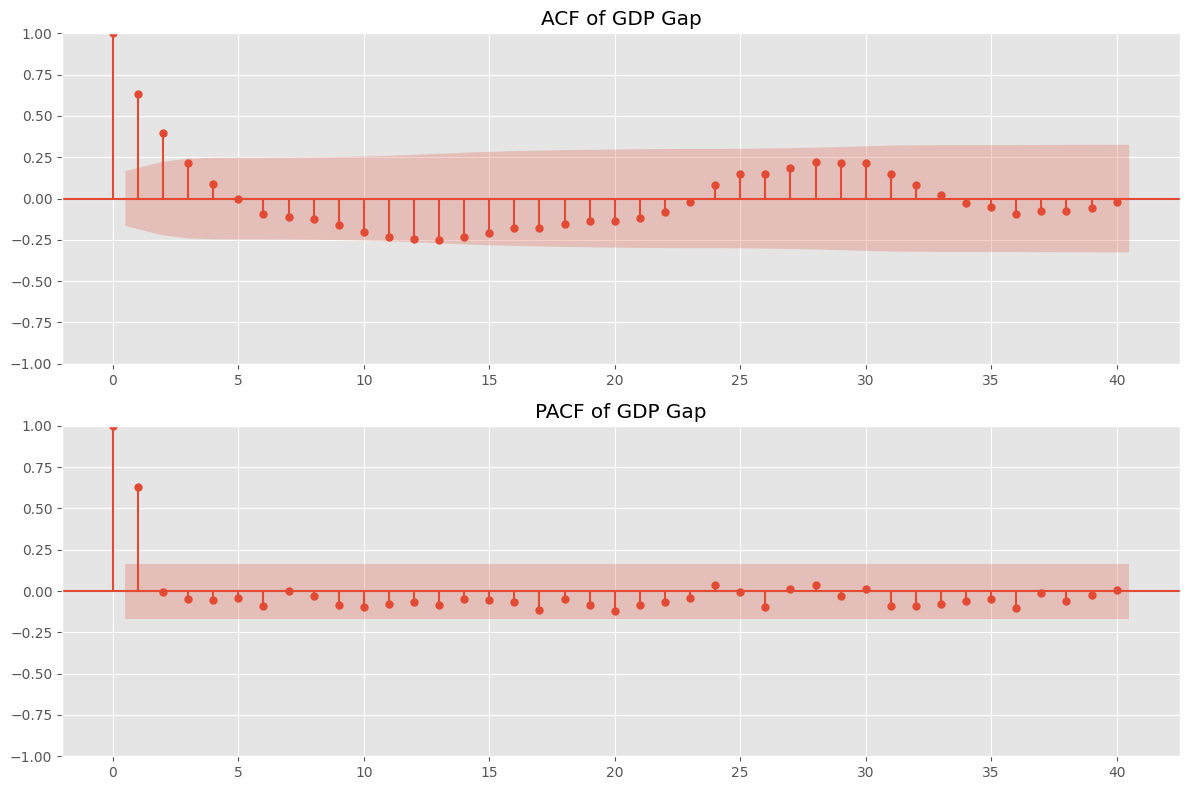

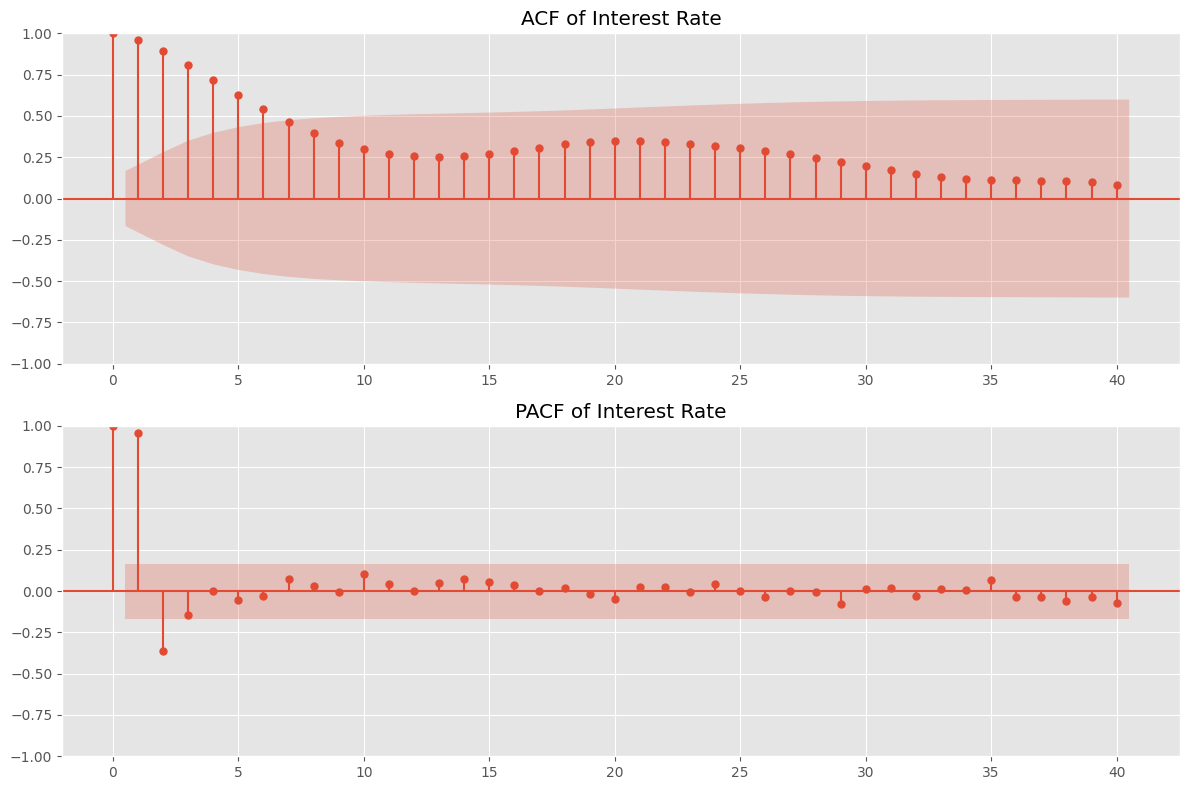

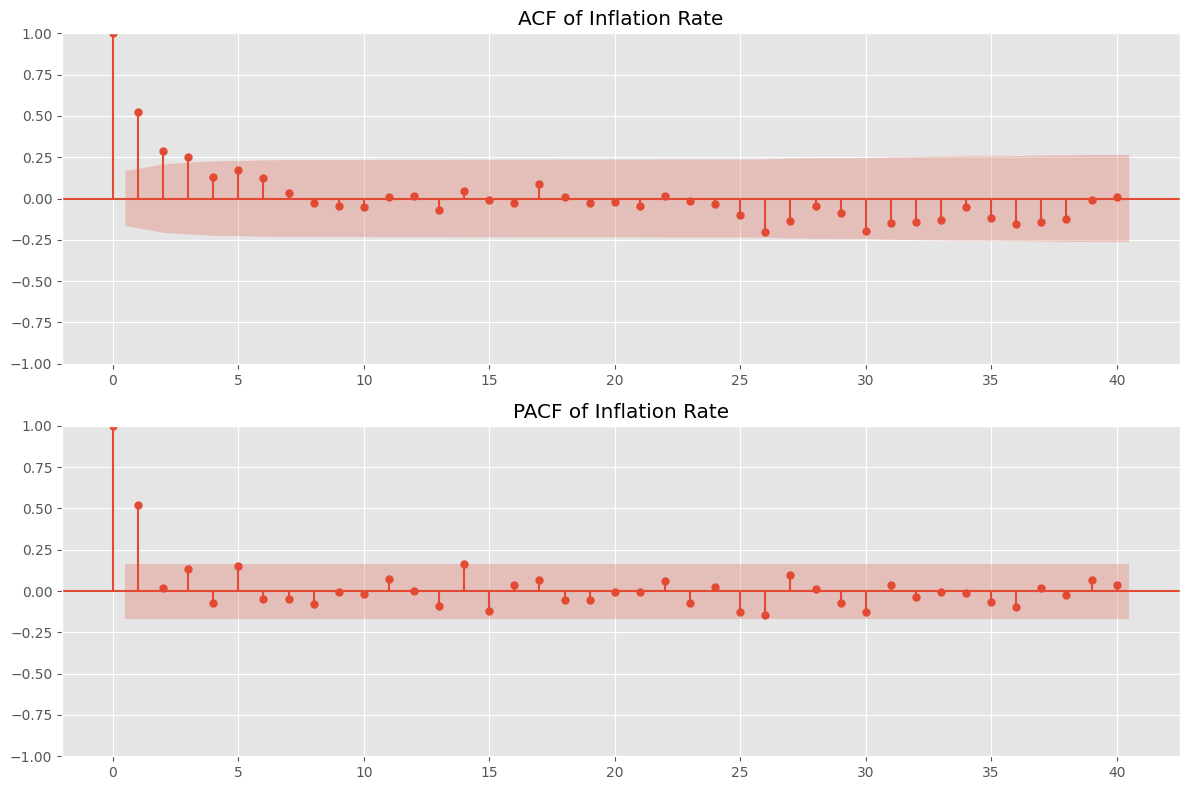

In [59]:
for col in data.columns:
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    sm.graphics.tsa.plot_acf(data[col], lags=40, ax=axes[0])
    sm.graphics.tsa.plot_pacf(data[col], lags=40, ax=axes[1])
    axes[0].set_title(f"ACF of {labels[col][0]}")
    axes[1].set_title(f"PACF of {labels[col][0]}")
    plt.tight_layout()
    plt.savefig(f"../figures/{col}_acf_pacf.png")
    plt.show()
